# Proyecto_1_Despliegue

Se importan las bibliotecas esenciales para la creación del modelo, tales como pandas, numpy, y las clases de Scikit-Learn para el preprocesamiento y el ajuste del modelo.

El archivo ARREGLO_DIRECTO.csv es cargado y se realiza una revisión inicial de la estructura de los datos con df.head() y df.info().

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
df = pd.read_csv('ARREGLO_DIRECTO.csv', delimiter=';')

In [3]:
df.head(5)

,PAID,FECHA_REGISTRO,UNIDAD_NOMBRE,PROYECTO_RNPC,UNIDAD_DEPARTAMENTO,DESTINO_DEPARTAMENTO,DESTINO_CIUDAD,ATENCION_TIPO_TRAMITE,ATENCION_DESTINO,ATENCION_TEMA,...,TIPO_PRODUCTO,NOMBRE_PRODUCTO,VALOR_PRODUCTO,FECHA_ADQUISICION,FECHA_ULTIMO_ENCUENTRO,FECHA_FIN_ULTIMO_ENCUENTRO,FECHA_FIN_REAL,ENCUENTRO_ACORDADO,FECHA_CONTRATO,DURACION
0,615062,2022-01-21,CB SAN CRISTOBAL,Casas del Consumidor Bogota,BOGOTA,BOGOTA,SAN CRISTOBAL,ARREGLO DIRECTO,SIC,Garantías,...,Bien,FABRICACION SOPORTE CAMA,220000,2021-03-30 00:00,2022-01-31,2022-02-01,2022-02-01,SI,2022-02-01 14:35,11
1,365005,2021-03-05,CB FONTIBON,Casas del Consumidor Bogota,BOGOTA,BOGOTA,FONTIBON,ARREGLO DIRECTO,SIC,Prestación de servicios que suponen la entrega...,...,Bien,cama de 1.40x190 tapizada,180000,2020-12-03 00:00,2021-03-10,2021-03-10,2021-03-10,SI,2021-03-10 11:05,5
2,317494,2020-10-28,CB FONTIBON,Casas del Consumidor Bogota,BOGOTA,BOGOTA,FONTIBON,ARREGLO DIRECTO,SIC,Garantías,...,Bien,celular,100000,2020-10-02 00:00,2020-10-28,2021-02-25,2021-02-25,SI,2021-02-25 13:25,120
3,325526,2020-11-11,CB SUBA,Casas del Consumidor Bogota,BOGOTA,BOGOTA,SUBA,ARREGLO DIRECTO,SIC,Información o publicidad engañosa,...,Bien,Vehiculo,22500000,2019-11-29 00:00,2020-11-26,2020-11-26,2020-11-26,SI,2020-11-26 11:32,15
4,458104,2021-07-14,CB SUBA,Casas del Consumidor Bogota,BOGOTA,BOGOTA,SUBA,ARREGLO DIRECTO,SIC,Garantías,...,Servicio,televisor 60 pulgadas marca LG,2600000,2018-05-16 00:00,2021-08-05,2021-08-05,2021-08-05,SI,2021-08-05 12:39,22


# Exploración Inicial de los Datos

Se define una función descripcion(df) para:

Mostrar una descripción general del dataset.
Indicar si existen valores faltantes en alguna columna y su porcentaje.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3991 entries, 0 to 3990
Data columns (total 34 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   PAID                            3991 non-null   int64 
 1   FECHA_REGISTRO                  3991 non-null   object
 2   UNIDAD_NOMBRE                   3991 non-null   object
 3   PROYECTO_RNPC                   3991 non-null   object
 4   UNIDAD_DEPARTAMENTO             3991 non-null   object
 5   DESTINO_DEPARTAMENTO            3991 non-null   object
 6   DESTINO_CIUDAD                  3991 non-null   object
 7   ATENCION_TIPO_TRAMITE           3991 non-null   object
 8   ATENCION_DESTINO                3991 non-null   object
 9   ATENCION_TEMA                   3991 non-null   object
 10  ATENCION_MOTIVO                 3991 non-null   object
 11  ATENCION_ESTADO                 3991 non-null   object
 12  PERSONA_RANGO_EDAD              3991 non-null   

In [5]:
# Se crea una función que realiza una exploración general a la base de datos
def descripcion(df):
  print("------------------ Descripción general de los datos ------------------")
  print("")
  print("En total la base de datos tiene " + str(len(df)) + " registros y " + str(df.shape[1])+ " variables.")
  print("")
  if df.isnull().any().any():
    print("Algunas columnas tienen valores faltantes. A continuación se muestra el porcentaje de valores nulos por columna:")
    print(df.isnull().sum() / len(df))
  else:
    print("La base de datos no tiene columnas con valores faltantes")

In [6]:
descripcion(df)

------------------ Descripción general de los datos ------------------

En total la base de datos tiene 3991 registros y 34 variables.

Algunas columnas tienen valores faltantes. A continuación se muestra el porcentaje de valores nulos por columna:
PAID                              0.000000
FECHA_REGISTRO                    0.000000
UNIDAD_NOMBRE                     0.000000
PROYECTO_RNPC                     0.000000
UNIDAD_DEPARTAMENTO               0.000000
DESTINO_DEPARTAMENTO              0.000000
DESTINO_CIUDAD                    0.000000
ATENCION_TIPO_TRAMITE             0.000000
ATENCION_DESTINO                  0.000000
ATENCION_TEMA                     0.000000
ATENCION_MOTIVO                   0.000000
ATENCION_ESTADO                   0.000000
PERSONA_RANGO_EDAD                0.000000
PERSONA_CONDICION_DISCAPACIDAD    0.000000
PERSONA_POBLACION_ESPECIAL        0.000000
PERSONA_GENERO                    0.000000
PERSONA_PROFESION                 0.000000
PERSONA_ACEPTA_HABEA

# Preprocesamiento de los Datos

Se crea un diccionario REGION_DEPTO para agrupar los departamentos en regiones. Este diccionario se aplica a la columna UNIDAD_DEPARTAMENTO para generar una nueva columna REGION.

Se eliminan caracteres no numéricos y valores "INDETERMINADO" de VALOR_PRODUCTO, y se convierte la columna a un tipo numérico. Los valores faltantes o igual a cero se reemplazan con el promedio calculado de los valores existentes.

Se seleccionan las variables REGION, ATENCION_TEMA, PERSONA_RANGO_EDAD, PERSONA_GENERO, PERSONA_PROFESION, TIPO_PRODUCTO, VALOR_PRODUCTO y DURACION.

Las variables categóricas seleccionadas se codifican utilizando OneHotEncoder, generando variables binarias.

El dataset se divide en conjuntos de entrenamiento y prueba en una proporción de 80/20.

In [7]:
REGION_DEPTO = {
    'ATLANTICO': 'Caribe',
    'BOLIVAR': 'Caribe',
    'CESAR': 'Caribe',
    'CORDOBA': 'Caribe',
    'SUCRE': 'Caribe',
    'SAN ANDRES': 'Caribe',
    'CAUCA': 'Pacífica',
    'VALLE DEL CAUCA': 'Pacífica',
    'NARIÑO': 'Pacífica',
    'BOGOTA': 'Andina',
    'CUNDINAMARCA': 'Andina',
    'HUILA': 'Andina',
    'TOLIMA': 'Andina',
    'QUINDIO': 'Andina',
    'RISARALDA': 'Andina',
    'SANTANDER': 'Andina',
    'N. DE SANTANDER': 'Andina',
    'META': 'Orinoquia'}

In [8]:
# Eliminar caracteres no numéricos y convertir a numérico
df['VALOR_PRODUCTO'] = df['VALOR_PRODUCTO'].replace({r'[^\d.]': '', 'INDETERMINADO': None}, regex=True)
df['VALOR_PRODUCTO'] = pd.to_numeric(df['VALOR_PRODUCTO'], errors='coerce')

# Calcular el promedio excluyendo ceros y NaN
promedio = df.loc[df['VALOR_PRODUCTO'] > 0, 'VALOR_PRODUCTO'].mean()

# Imputar los valores de '0' y NaN con el promedio calculado
df['VALOR_PRODUCTO'] = df['VALOR_PRODUCTO'].apply(lambda x: promedio if pd.isna(x) or x == 0 else x)

df['REGION'] = df['UNIDAD_DEPARTAMENTO'].map(REGION_DEPTO)

In [9]:
variables_interes = ['REGION', 'ATENCION_TEMA', 'PERSONA_RANGO_EDAD', 'PERSONA_GENERO',
                     'PERSONA_PROFESION', 'TIPO_PRODUCTO', 'VALOR_PRODUCTO', 'DURACION']
data = df[variables_interes].copy()

In [10]:
# Crear transformador para variables categóricas
categorical_features = ['REGION', 'ATENCION_TEMA', 'PERSONA_RANGO_EDAD', 'PERSONA_GENERO', 'PERSONA_PROFESION', 'TIPO_PRODUCTO']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

In [11]:
# Dividir en características
X = data.drop('DURACION', axis=1)
y = data['DURACION']

In [12]:
# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo: Creación del Pipeline y Preprocesado

Se utiliza ColumnTransformer para aplicar OneHotEncoder a las variables categóricas, mientras que el resto de columnas permanecen sin cambios.

Se crea un pipeline que incluye el preprocesamiento de datos seguido del modelo GradientBoostingRegressor.

In [13]:
# Crear preprocesador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# Pipeline que incluye el preprocesamiento y el modelo
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', GradientBoostingRegressor(random_state=42))])

# Búsqueda de Hiperparámetros con GridSearchCV

Se define un rango de hiperparámetros (n_estimators, learning_rate, max_depth, subsample) para optimizar el modelo GradientBoostingRegressor.

Se configura GridSearchCV para realizar validación cruzada con 5 particiones (cv=5), optimizando el error absoluto medio (scoring='neg_mean_absolute_error').

Una vez finalizada la búsqueda, se obtienen los mejores parámetros que maximizan el rendimiento del modelo.

In [14]:
# Definir el espacio de búsqueda para Grid Search
param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0]
}

# Configurar Grid Search con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# Mejor estimador
print("Mejores hiperparámetros:", grid_search.best_params_)
model = grid_search.best_estimator_

# Validación cruzada
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
print("MAE promedio con validación cruzada:", -scores.mean())

Mejores hiperparámetros: {'model__learning_rate': 0.01, 'model__max_depth': 3, 'model__n_estimators': 50, 'model__subsample': 1.0}
MAE promedio con validación cruzada: 11.800756905584938


# Entrenamiento y Evaluación del Modelo

Se entrena el modelo con los mejores hiperparámetros encontrados en los datos de entrenamiento (X_train, y_train).

Se evalúa el rendimiento del modelo en el conjunto de prueba, calculando las métricas:
MAE: Error absoluto medio.
MSE: Error cuadrático medio.
R²: Coeficiente de determinación.

In [15]:
# Entrenar y evaluar el modelo con los mejores hiperparámetros
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Métricas de evaluación
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Coeficiente de determinación (R²):", r2)

Mean Absolute Error (MAE): 10.838615086299113
Mean Squared Error (MSE): 983.9260924922687
Coeficiente de determinación (R²): 0.003691295429752217


# Importancia de Características

Para identificar las características que más influyen en el modelo:

Se extraen las importancias de las características (feature_importances_).
Se grafican las 10 características más relevantes para visualizar su contribución al modelo.

In [16]:
# Importancia de características (solo si el modelo lo permite)
feature_importance = model.named_steps['model'].feature_importances_
sorted_idx = np.argsort(feature_importance)
features = model.named_steps['preprocessor'].get_feature_names_out()

top_n = 10
sorted_idx = np.argsort(feature_importance)[-top_n:]
top_features = [features[i] for i in sorted_idx]
top_importance = feature_importance[sorted_idx]

# Visualización de Importancia de Características

Se utiliza matplotlib para graficar la importancia de las 10 características principales, mostrando las variables más influyentes en la predicción de DURACION.

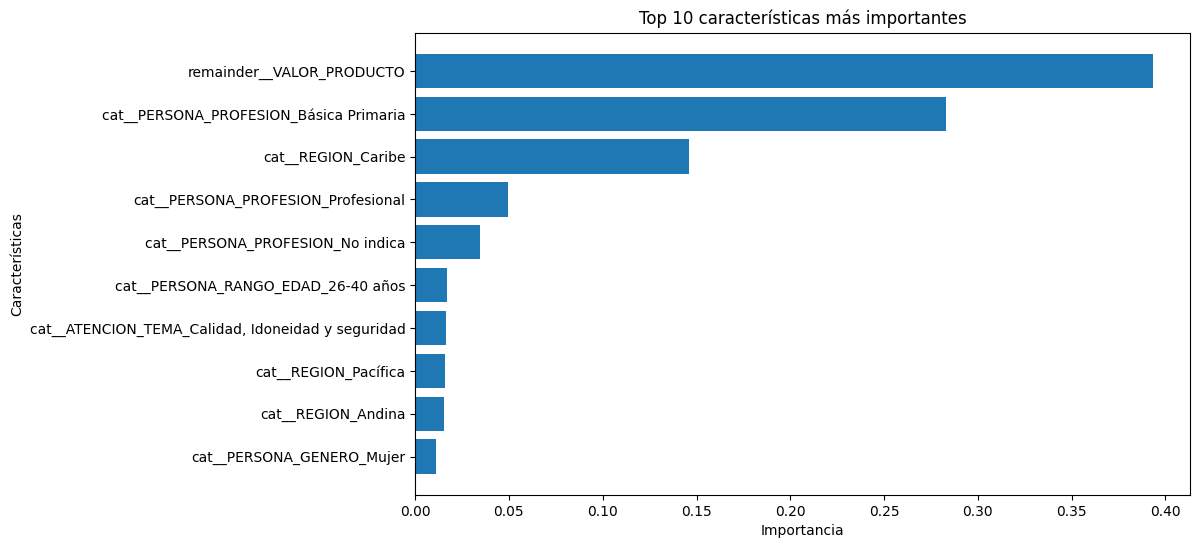

In [17]:
# Graficar
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), top_importance, align='center')
plt.yticks(range(len(sorted_idx)), top_features)
plt.title('Top 10 características más importantes')
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.show()

Attempt 1 - MSE: 983.9260924922687
Attempt 2 - MSE: 1035.977901034817
Attempt 3 - MSE: 1209.5264543756946
Attempt 4 - MSE: 1202.2149882682306

Summary of Results:
     Attempt          MSE
0  Attempt 1   983.926092
1  Attempt 2  1035.977901
2  Attempt 3  1209.526454
3  Attempt 4  1202.214988


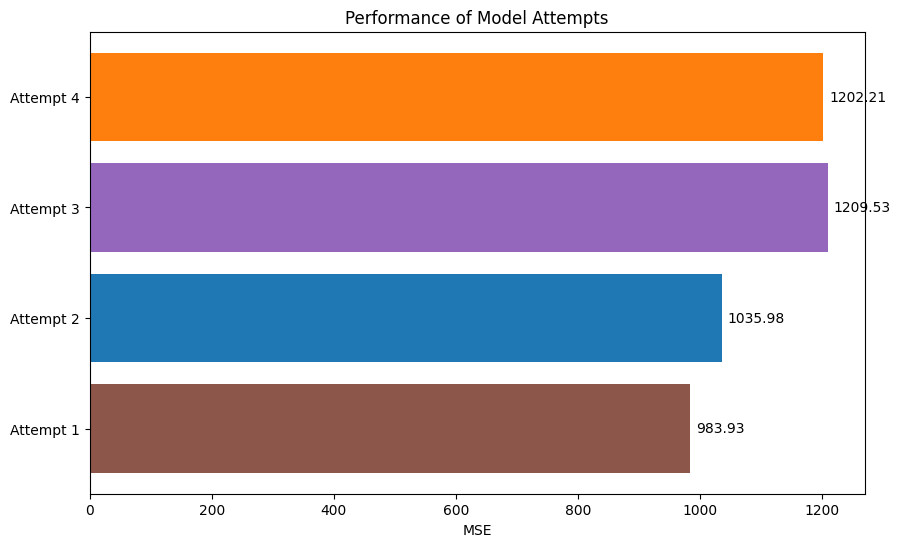

In [27]:
# Definir los hiperparámetros para cada intento
attempts = {
    "Attempt 1": {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.01, 'min_samples_split': 2},
    "Attempt 2": {'n_estimators': 120, 'max_depth': 3, 'learning_rate': 0.08, 'min_samples_split': 4},
    "Attempt 3": {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.03, 'min_samples_split': 2},
    "Attempt 4": {'n_estimators': 250, 'max_depth': 4, 'learning_rate': 0.05, 'min_samples_split': 3}
}

# resultados de cada intento
results = []

# Probar cada conjunto de hiperparámetros
for name, params in attempts.items():
    # Crear pipeline con preprocesamiento y el modelo
    model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('regressor', GradientBoostingRegressor(**params))
    ])

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones y calcular el MSE
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Guardar el resultado
    results.append((name, mse))
    print(f"{name} - MSE: {mse}")

# Crear un DataFrame con los resultados para visualización o análisis adicional
results_df = pd.DataFrame(results, columns=["Attempt", "MSE"])
print("\nSummary of Results:")
print(results_df)

# Graficar los resultados
plt.figure(figsize=(10, 6))
plt.barh(results_df['Attempt'], results_df['MSE'], color=['#8c564b', '#1f77b4', '#9467bd', '#ff7f0e'])
plt.xlabel('MSE')
plt.title('Performance of Model Attempts')
for i, v in enumerate(results_df['MSE']):
    plt.text(v + 10, i, f"{v:.2f}", va='center')
plt.show()

